DATASET: https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset

# BUSSINES UNDERSTANDING

Model klasifikasi dengan menggunakan algoritma SVM pada data pistachio akan membantu memisahkan dan mengklasifikasikan pistachio berdasarkan atribut-atribut seperti AREA (luas), PERIMETER (keliling), MAJOR_AXIS (sumbu utama), MINOR_AXIS (sumbu minor), ECCENTRICITY (eksentrisitas), EQDIASQ (luas sama dengan diameter persegi), SOLIDITY (kepadatan), CONVEX_AREA (luas cembung), EXTENT (tingkat perluasan), ASPECT_RATIO (rasio aspek), ROUNDNESS (kebulatan), COMPACTNESS (kekompakan), SHAPEFACTOR_1 hingga SHAPEFACTOR_4, serta kelas (Class).

Dengan memanfaatkan atribut-atribut tersebut, model SVM dapat mempelajari pola dan hubungan antara atribut-atribut tersebut dalam data pelatihan. Setelah melalui proses pelatihan, model ini dapat digunakan untuk mengklasifikasikan pistachio baru ke dalam kategori yang sesuai berdasarkan atribut-atribut yang diukur. Dalam industri pistachio, model klasifikasi ini dapat membantu para produsen dan pedagang untuk secara otomatis mengklasifikasikan pistachio dengan lebih efisien, meningkatkan akurasi klasifikasi, dan mengoptimalkan kualitas produk pistachio yang dihasilkan.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [2]:
df = pd.read_excel('Pistachio.xlsx')

# DATA UNDERSTANDING

deskripsi tabel:

AREA = luas pistachio

PERIMETER = keliling pistachio

MAJOR_AXIS = sumbu utama),

MINOR_AXIS (sumbu minor),

ECCENTRICITY (eksentrisitas),

EQDIASQ (luas sama dengan diameter persegi),

SOLIDITY (kepadatan pistachio

CONVEX_AREA (luas cembung pistachio

EXTENT (tingkat perluasan pistachio

ASPECT_RATIO (rasio aspek pistachio

ROUNDNESS (kebulatan pistachio

COMPACTNESS = kepadatan pistachio

SHAPEFACTOR_1 - SHAPEFACTOR_4 = Kompleksitas atau kerumitan bentuk pistachio

(Class).

In [3]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [4]:
df.shape

(2148, 17)

In [5]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [6]:
df['Class'].value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

# DATA PREPARATION

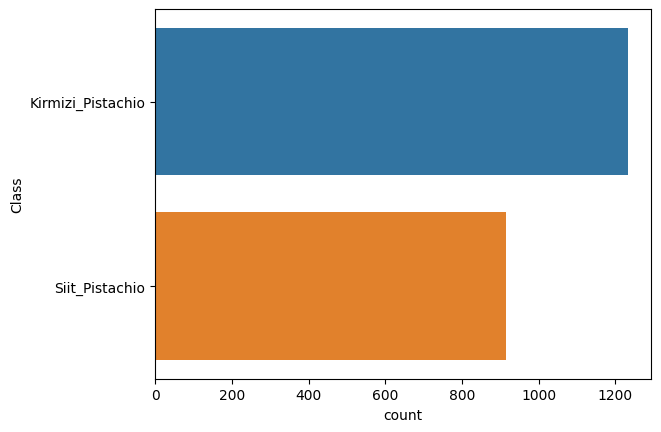

In [7]:
sns.countplot(data=df,y="Class")
plt.show()

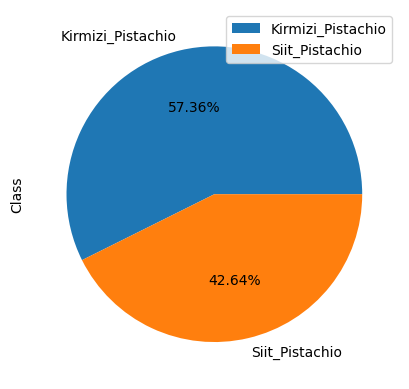

In [8]:
df["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.legend(df["Class"].unique())
plt.show()

In [9]:
df.replace(('Kirmizi_Pistachio', 'Siit_Pistachio'), (0,1), inplace=True) #gender

In [10]:
# drop multiple columns
columns_to_drop = ['SHAPEFACTOR_1', 'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4']
df = df.drop(columns=columns_to_drop)


In [11]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'Class'],
      dtype='object')

# MODELLING

In [12]:
# memisahkan data dan label
X = df.drop (columns='Class', axis=1)
Y = df['Class']

In [13]:
print(X)

        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0      63391  1568.4050    390.3396    236.7461        0.7951  284.0984   
1      68358  1942.1870    410.8594    234.7525        0.8207  295.0188   
2      73589  1246.5380    452.3630    220.5547        0.8731  306.0987   
3      71106  1445.2610    429.5291    216.0765        0.8643  300.8903   
4      80087  1251.5240    469.3783    220.9344        0.8823  319.3273   
...      ...        ...         ...         ...           ...       ...   
2143   85983  1157.1160    444.3447    248.8627        0.8284  330.8730   
2144   85691  2327.3459    439.8794    278.9297        0.7732  330.3107   
2145  101136  1255.6190    475.2161    271.3299        0.8210  358.8459   
2146   97409  1195.2150    452.1823    274.5764        0.7945  352.1718   
2147   78466  2356.9080    445.9131    258.5125        0.8148  316.0791   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  
0       0.8665        7

In [14]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
2143    1
2144    1
2145    1
2146    1
2147    1
Name: Class, Length: 2148, dtype: int64


3. Standarisasi Data

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standarized_data = scaler.transform(X)

In [18]:
print(standarized_data)

[[-1.26229557  0.3793384  -1.72358958 ... -1.03878418 -1.15355007
   0.33058803]
 [-0.88367525  1.3748213  -1.09099947 ... -0.61636225 -1.60533844
   0.11279048]
 [-0.48493096 -0.47788077  0.18848508 ...  0.63673946  0.1218941
  -0.81677844]
 ...
 [ 1.61489872 -0.45369561  0.89300681 ... -0.61136318  1.11385399
   0.94356464]
 [ 1.33080009 -0.61456785  0.18291441 ... -1.04711597  1.35267657
   1.47570917]
 [-0.11317108  2.47933587 -0.01035424 ... -0.72175944 -1.84134028
  -0.09602573]]


In [19]:
X = standarized_data
Y = df['Class']

In [20]:
print(X)
print(Y)

[[-1.26229557  0.3793384  -1.72358958 ... -1.03878418 -1.15355007
   0.33058803]
 [-0.88367525  1.3748213  -1.09099947 ... -0.61636225 -1.60533844
   0.11279048]
 [-0.48493096 -0.47788077  0.18848508 ...  0.63673946  0.1218941
  -0.81677844]
 ...
 [ 1.61489872 -0.45369561  0.89300681 ... -0.61136318  1.11385399
   0.94356464]
 [ 1.33080009 -0.61456785  0.18291441 ... -1.04711597  1.35267657
   1.47570917]
 [-0.11317108  2.47933587 -0.01035424 ... -0.72175944 -1.84134028
  -0.09602573]]
0       0
1       0
2       0
3       0
4       0
       ..
2143    1
2144    1
2145    1
2146    1
2147    1
Name: Class, Length: 2148, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(2148, 12) (1718, 12) (430, 12)


5. Membuat data latih menggunakan algoritma SVM

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [25]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.8760186263096624


In [27]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.8697674418604651


In [29]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0


# EVALUATION

7. Membuat Model Prediksi

In [30]:
input_data = (63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278)
# input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
if (prediction[0] == 0):
    print('Jenis Kirmizi Pistachio')
else :
    print('Jenis Siit Pistachio')

[[-1.26229557  0.3793384  -1.72358958 -0.05166846 -0.92556042 -1.25716866
  -1.4590027  -0.90145749 -1.45976311 -1.03878418 -1.15355007  0.33058803]]

[0]

Jenis Kirmizi Pistachio


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. simpan model

In [31]:
import pickle

In [32]:
filename = 'pistachio.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler.sav','wb'))